A partir del archivo food_100, se pide:

1. Limpiar el archivo borrando las columnas Unnamed.
2. ¿Qué porcentaje de valores NaN hay en cada columna?
3. ¿Tendría algún sentido clasificar el nombre de los alimentos a partir del top5 de columnas numéricas con menos valores NaN?

In [5]:
import pandas as pd
df = pd.read_csv("data/food_100.csv")

df

,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,34715,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055715,2017-03-09T10:35:15Z,1489055715,2017-03-09T10:35:15Z,Organic Pecan Halves,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,96,34784,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489138485,2017-03-10T09:34:45Z,1489138485,2017-03-10T09:34:45Z,Unsalted Dry Roasted Almonds,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,97,34791,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055720,2017-03-09T10:35:20Z,1489055720,2017-03-09T10:35:20Z,Organic Raw Pumpkin Seeds,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
98,98,35071,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489138484,2017-03-10T09:34:44Z,1489138484,2017-03-10T09:34:44Z,Organic Extra Virgin Olive Oil,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1. Borrar columnas Unnamed

In [6]:
df.shape

(100, 164)

In [7]:
columns_l = list(df.columns)
for i in columns_l:
    if 'Unnamed' in i:
        print('Dropped: ',i)
        df = df.drop(columns='Unnamed: 0')

df.shape

Dropped:  Unnamed: 0


(100, 163)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(125), int64(3), object(35)
memory usage: 127.5+ KB


### 2. Porcentage de Nans en columnas

In [8]:
missing_prcnt = df.isnull().sum() * 100 / len(df)
missing_prcnt = missing_prcnt.sort_values()
missing_prcnt

code                             0.0
countries_tags                   0.0
countries_en                     0.0
states_tags                      0.0
states                           0.0
                               ...  
-arachidic-acid_100g           100.0
-stearic-acid_100g             100.0
-palmitic-acid_100g            100.0
-eicosapentaenoic-acid_100g    100.0
water-hardness_100g            100.0
Length: 163, dtype: float64

<AxesSubplot:>

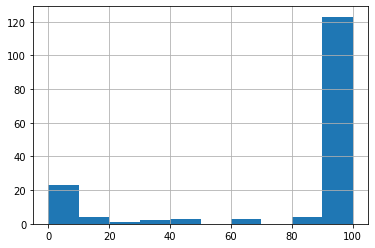

In [36]:
missing_prcnt.hist()

### 3. ¿Tendría algún sentido clasificar el nombre de los alimentos a partir del top5 de columnas numéricas con menos valores NaN?

In [9]:
# Buscar columna con nombre de alimentos
for i in columns_l:
    if 'name' in i:
        print(i)

Unnamed: 0
product_name
generic_name


In [10]:
# Dataframe con top 5 columnas numéricas con menos nans y nombre de alimento

study_df = df[missing_prcnt.index.values].select_dtypes(include=['float64', 'int64']).iloc[:,:5].join(df['product_name'])
study_df

,code,last_modified_t,created_t,ingredients_from_palm_oil_n,additives_n,product_name
0,3087,1474103893,1474103866,NaN,NaN,Farine de blé noir
1,4530,1489069957,1489069957,0.0,0.0,Banana Chips Sweetened (Whole)
2,4559,1489069957,1489069957,0.0,0.0,Peanuts
3,16087,1489055731,1489055731,0.0,0.0,Organic Salted Nut Mix
4,16094,1489055653,1489055653,0.0,0.0,Organic Polenta
...,...,...,...,...,...,...
95,34715,1489055715,1489055715,0.0,0.0,Organic Pecan Halves
96,34784,1489138485,1489138485,0.0,0.0,Unsalted Dry Roasted Almonds
97,34791,1489055720,1489055720,0.0,0.0,Organic Raw Pumpkin Seeds
98,35071,1489138484,1489138484,0.0,0.0,Organic Extra Virgin Olive Oil


In [20]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split

In [12]:
# Hacer modelo de clasificación para ver si las columnas seleccionadas servivrían para clasificar los alimentos
df_n = study_df.dropna()
X = df_n.iloc[:,: 5].values
y = df_n['product_name'].values.reshape(-1,1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [14]:
from sklearn.svm import SVC 

In [15]:
# SVM

svr_poly = SVC(C=1000, kernel='rbf', gamma=10)
svr_poly.fit(X_train, y_train)
print('Train score =', svr_poly.score(X_train, y_train))
print('Test score =', svr_poly.score(X_test, y_test))

Train score = 1.0
Test score = 0.0


In [18]:
# Logarithmic regression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print('Training data accuracy -->', log_reg.score(X_train, y_train))
print('Test data accuracy -->', log_reg.score(X_test, y_test))

Training data accuracy --> 0.013157894736842105
Test data accuracy --> 0.0


In [22]:
# Knn 

knn_mod = KNeighborsClassifier(n_neighbors=7)
knn_mod.fit(X_train, y_train)
print('Training data accuracy -->', knn_mod.score(X_train, y_train))
print('Test data accuracy -->', knn_mod.score(X_test, y_test))

Training data accuracy --> 0.14473684210526316
Test data accuracy --> 0.0


Según los diferentes modelos de clasificación utilizados, parece que las columnas seleccionadas para clasificar los alimentos no es buena.